In [1]:
import os
import numpy as np
from skimage.feature import local_binary_pattern
from sklearn import manifold
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
%matplotlib nbagg

In [2]:
def get_path(person, number):
    filepath = os.path.join('s{}'.format(person), '{}.pgm'.format(number))
    return filepath

In [3]:
def load_image(filepath):
    im = Image.open(filepath)
    return im

In [4]:
def show_image(im):
    fig1, ax1 = plt.subplots(1, 1)
    ax1.imshow(im, cmap = 'gray');
    return

In [5]:
def compute_show_lbp(radius, n_points, image):
    lbp = local_binary_pattern(image, n_points, radius)
    return lbp

In [6]:
def calculate_histogram(lbp):
    n_bins = int(lbp.max() + 1)
    histo, _ = np.histogram(lbp, normed=True, bins=n_bins, range=(0, n_bins))
    return histo

In [7]:
person = 1
number = 6
radius = 3
n_points = 5 * radius

<IPython.core.display.Javascript object>


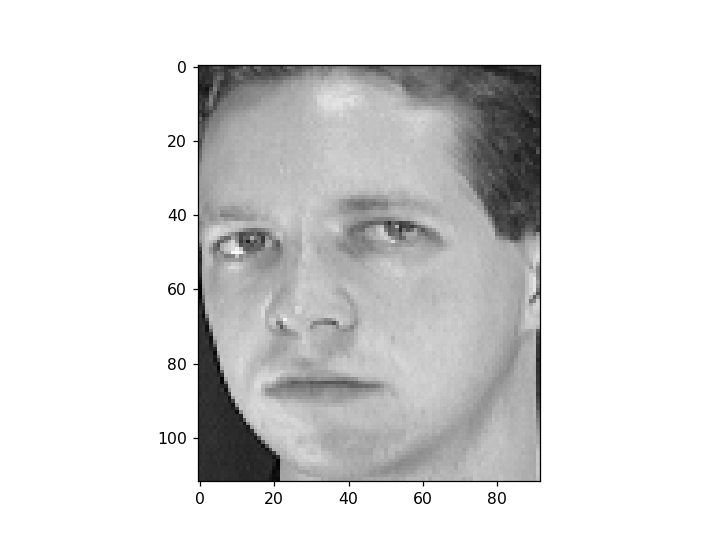

In [8]:
filepath = get_path(person, number)
im = load_image(filepath)
show_image(im)

<IPython.core.display.Javascript object>


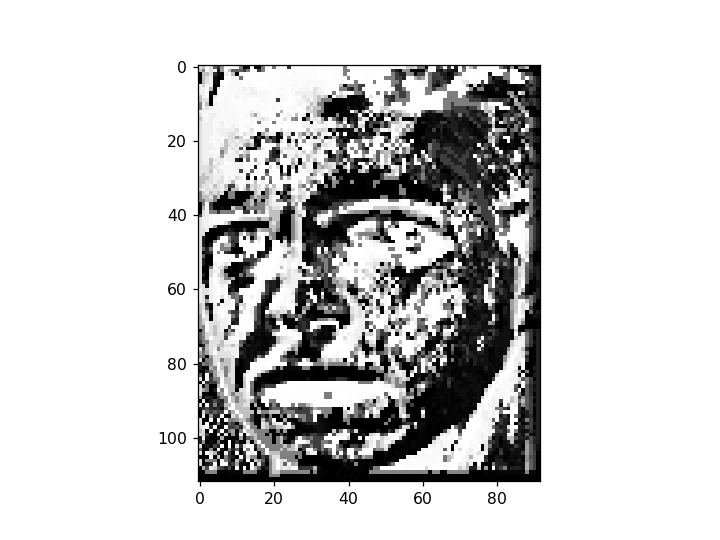

In [9]:
lbp = compute_show_lbp(radius, n_points, im)
show_image(lbp)

In [10]:
histo = calculate_histogram(lbp)

In [11]:
histo.shape

(32768,)

In [12]:
people = 41
numbers = 11
features = np.empty((400,32768))
i = 0
for person in range(1, people):
    for number in range(1, numbers):
        filepath = get_path(person, number)
        im = load_image(filepath)
        lbp = compute_show_lbp(radius, n_points, im)
        histo = calculate_histogram(lbp)
        features[i] = histo
        i += 1

In [13]:
people = 41
numbers = 11
ims = np.empty((400,10304))
i = 0
for person in range(1, people):
    for number in range(1, numbers):
        filepath = get_path(person, number)
        im = load_image(filepath)
        im_pro = np.array(im).ravel().astype(float)
        ims[i] = im_pro
        i += 1

In [14]:
ims.shape

(400, 10304)

In [15]:
iso = manifold.Isomap(n_neighbors=2, n_components=100, max_iter=500)
Z = iso.fit_transform(ims)

<IPython.core.display.Javascript object>


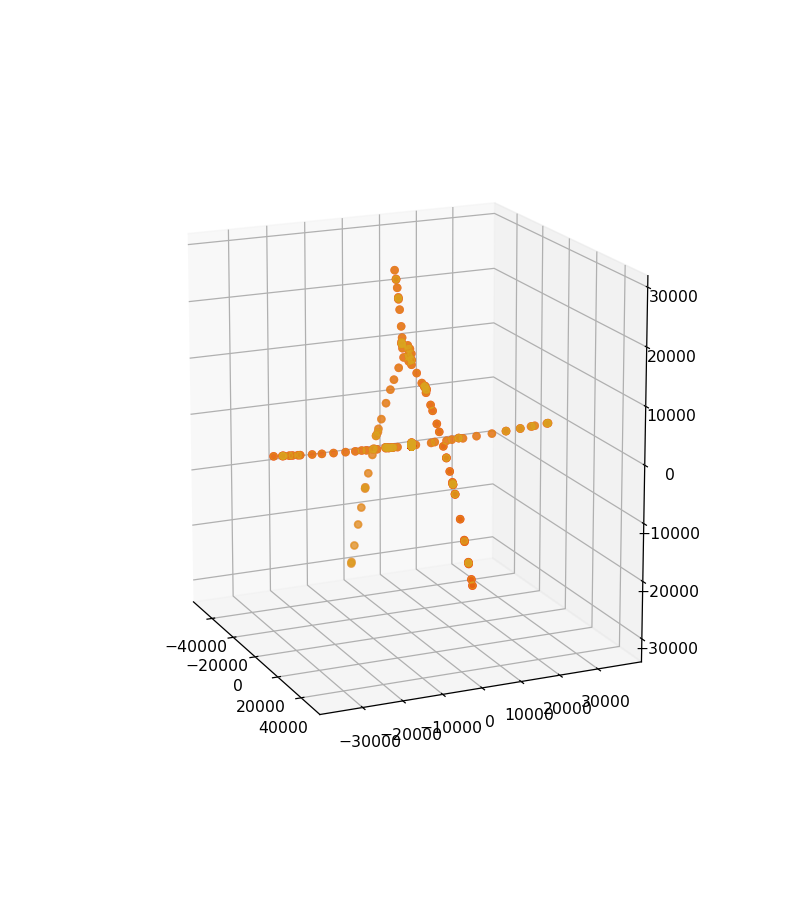

In [16]:
fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c='r', cmap = plt.cm.Spectral);

In [17]:
def init():
    ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], marker='o', s=20, c="goldenrod", alpha=0.6)
    return fig,

In [18]:
def animate(i):
    ax.view_init(elev=15., azim=i)
    return fig,

In [19]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
plt.show()